In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [6]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [7]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [16]:
df_copy=df

In [18]:
#df_copy["Sex"].replace({"F" : 0, "M" : 1}, inplace = True)
#df_copy["ChestPainType"].replace({"ATA" : 0, "NAP" : 1, "ASY" : 2, "TA" : 3}, inplace = True)
#df_copy["ExerciseAngina"].replace({"N" : 0, "Y" : 1}, inplace = True)
#df_copy["ST_Slope"].replace({"Up" : 0, "Flat" : 1, "Down" : 2}, inplace = True)
#df_copy["RestingECG"].replace({"Normal" : 0, "ST" : 1, "LVH" : 2}, inplace = True)
df_copy = pd.get_dummies(df_copy, columns=['Sex'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ChestPainType'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ExerciseAngina'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ST_Slope'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['RestingECG'], drop_first=True)

In [19]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_1,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


In [22]:
df_copy.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_1                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
dtype: object

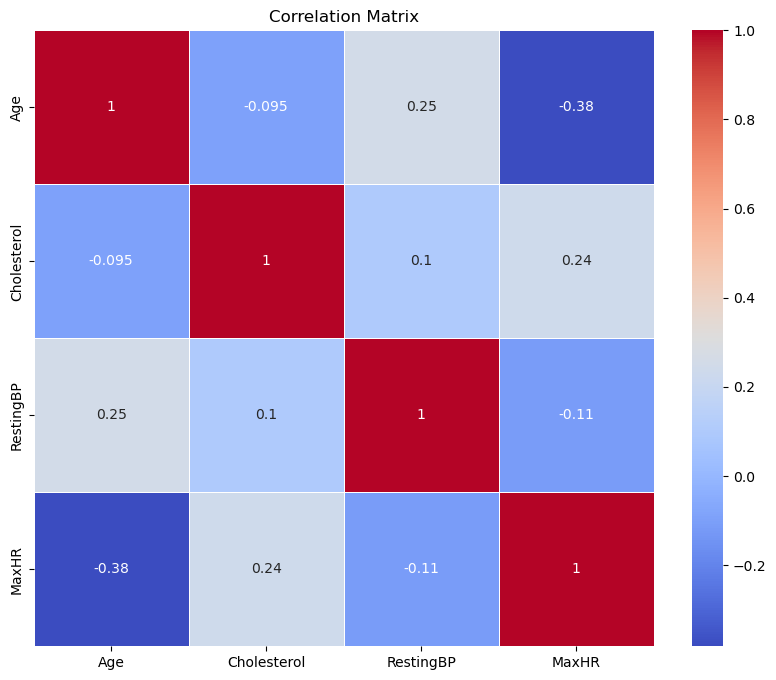

In [23]:
selected_columns = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
correlation_matrix = df_copy[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

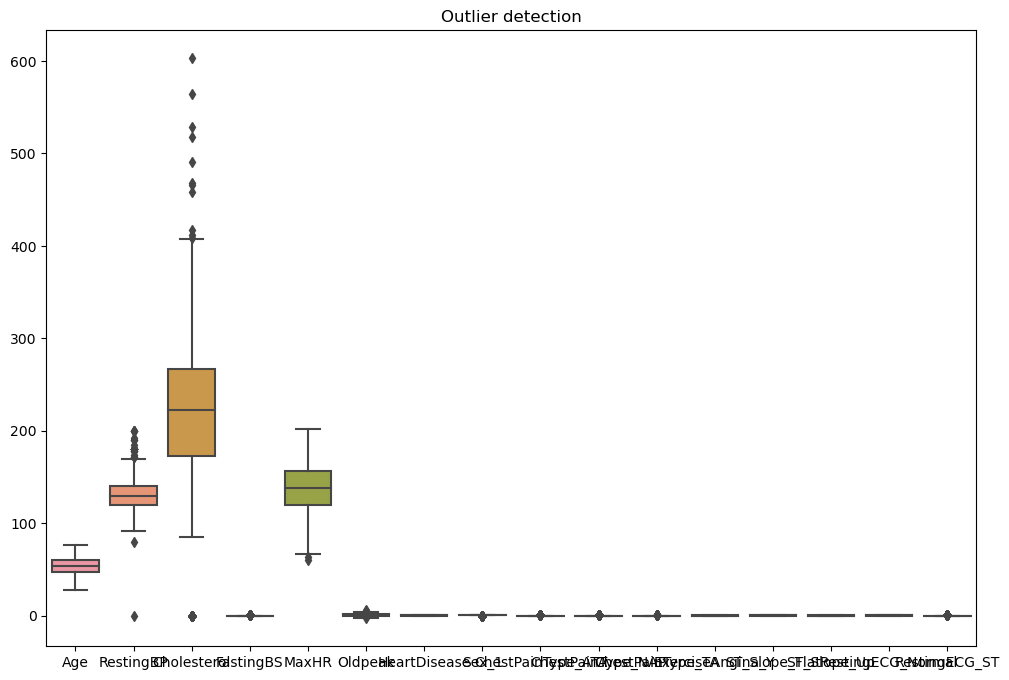

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_copy).set(title="Outlier detection")
plt.show()

# Log Trasformation for the outliers

In [35]:
columns_to_transform = ['Cholesterol', 'RestingBP', 'MaxHR']

# Apply log transformation
df_copy_log = df_copy.copy()
df_copy_log[columns_to_transform] = np.log1p(df_copy_log[columns_to_transform])

# Check the shape of the transformed DataFrame
print("Original shape:", df_copy.shape)
print("Shape after log transformation:", df_copy_log.shape)


Original shape: (918, 16)
Shape after log transformation: (918, 16)


# StandardScaler logistic regression


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# MinMaxScaler Logistic Regression


In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# MinMaxScaler Logistic Regression using the formula

In [42]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_scaled = scaler.fit_transform(X)

# Add a bias term to the features
X_scaled = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Convert y to a 1D NumPy array
y = y.values.reshape(-1, 1)

# Initialize parameters
theta = np.zeros((X_scaled.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, costs = gradient_descent(X_scaled, y, theta, learning_rate, iterations)

# Make predictions
predictions = np.round(sigmoid(np.dot(X_scaled, theta)))

# Evaluate the performance of the model
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)


Accuracy: 0.8529411764705882


# 

# StandardScaler Logistic Regression Using RFE

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Initialize Recursive Feature Elimination (RFE) with the logistic regression model
rfe = RFE(logreg_model, n_features_to_select=5)  # Adjust the number of features as needed

# Fit RFE on the scaled training set
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Train the model on the scaled training set with selected features
logreg_model.fit(X_train_rfe, y_train)

# Transform the testing set to include only selected features
X_test_rfe = rfe.transform(X_test_scaled)

# Make predictions on the scaled testing set with selected features
y_pred = logreg_model.predict(X_test_rfe)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", X.columns[rfe.support_])
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Selected Features: Index(['Cholesterol', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ExerciseAngina_Y', 'ST_Slope_Up'],
      dtype='object')

Accuracy: 0.842391304347826

Confusion Matrix:
 [[66 11]
 [18 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.89      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



# StandardScaler Logistic Regression Using L1 Regularization

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Access the selected features and their coefficients
selected_features = X.columns[np.abs(logreg_model.coef_[0]) > 0]
coefficients = logreg_model.coef_[0]

print("Selected Features:", selected_features)
print("Coefficients:", coefficients)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Selected Features: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_1', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal',
       'RestingECG_ST'],
      dtype='object')
Coefficients: [ 0.15335912 -0.00117247 -0.6083086   0.36905847 -0.06719283  0.48421366
  0.54583132 -0.54727566 -0.59008161 -0.20268524  0.52648403  0.6668032
 -0.52218759 -0.07941589 -0.16353822]

Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

